In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.under_sampling import *
from sklearn.decomposition import PCA
from imblearn.combine import SMOTETomek
from lightgbm import LGBMClassifier
from sklearn.preprocessing import PolynomialFeatures

warnings.filterwarnings('ignore')
%matplotlib inline

In [26]:
train = pd.read_csv('train.csv', encoding='CP949')
train.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [6]:
train.shape

(5000, 18)

In [7]:
train.dtypes

custid         int64
gender         int64
총구매액           int64
구매건수           int64
평균구매가격         int64
평균할부개월수      float64
구매브랜드종류        int64
내점일수           int64
수입상품_구매비율    float64
주말방문비율       float64
가을_구매건수      float64
겨울_구매건수      float64
봄_구매건수       float64
여름_구매건수      float64
아침_구매건수      float64
저녁_구매건수      float64
점심_구매건수      float64
주구매코너         object
dtype: object

In [8]:
train.isnull().sum().sum()

6107

In [4]:
test = pd.read_csv('test.csv', encoding='CP949')
test.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,장신구
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,유아동복
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,유아동복
3,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,15.0,9.0,17.0,NaN,4.0,42.0,수입명품
4,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,NaN,5.0,3.0,NaN,NaN,26.0,스포츠


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   총구매액       5000 non-null   int64  
 2   구매건수       5000 non-null   int64  
 3   평균구매가격     5000 non-null   int64  
 4   평균할부개월수    5000 non-null   float64
 5   구매브랜드종류    5000 non-null   int64  
 6   내점일수       5000 non-null   int64  
 7   수입상품_구매비율  5000 non-null   float64
 8   주말방문비율     5000 non-null   float64
 9   가을_구매건수    4052 non-null   float64
 10  겨울_구매건수    4089 non-null   float64
 11  봄_구매건수     4319 non-null   float64
 12  여름_구매건수    4009 non-null   float64
 13  아침_구매건수    3608 non-null   float64
 14  저녁_구매건수    3975 non-null   float64
 15  점심_구매건수    4861 non-null   float64
 16  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(6), object(1)
memory usage: 664.2+ KB


In [10]:
test.shape

(5000, 17)

In [11]:
test.dtypes

custid         int64
총구매액           int64
구매건수           int64
평균구매가격         int64
평균할부개월수      float64
구매브랜드종류        int64
내점일수           int64
수입상품_구매비율    float64
주말방문비율       float64
가을_구매건수      float64
겨울_구매건수      float64
봄_구매건수       float64
여름_구매건수      float64
아침_구매건수      float64
저녁_구매건수      float64
점심_구매건수      float64
주구매코너         object
dtype: object

In [13]:
train.isnull().sum(axis=0)

custid          0
gender          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       945
겨울_구매건수       897
봄_구매건수        689
여름_구매건수      1022
아침_구매건수      1442
저녁_구매건수       967
점심_구매건수       145
주구매코너           0
dtype: int64

In [16]:
test.isnull().sum(axis=0)

custid          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       948
겨울_구매건수       911
봄_구매건수        681
여름_구매건수       991
아침_구매건수      1392
저녁_구매건수      1025
점심_구매건수       139
주구매코너           0
dtype: int64

In [18]:
train.describe()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4055.000000,4103.000000,4311.000000,3978.000000,3558.000000,4033.000000,4855.000000
mean,25200.496600,0.304200,3.360421e+06,34.538400,102564.0746,1.915660,17.368800,18.054800,17.989860,38.571880,10.170160,9.911772,10.572489,11.364002,8.678471,9.210265,21.559011
std,14376.680764,0.460114,5.088433e+06,40.109424,79091.0458,0.730558,14.582432,19.369182,19.483598,24.509818,11.316941,10.785779,11.745474,12.665271,12.734328,12.351998,26.484375
min,18.000000,0.000000,-1.237971e+06,1.000000,-72822.0000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,12835.750000,0.000000,7.223850e+05,10.000000,54811.0000,1.400000,7.000000,6.000000,5.000000,22.200000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,5.000000
50%,25345.000000,0.000000,1.806748e+06,21.000000,82201.5000,1.800000,13.000000,12.000000,12.500000,34.850000,6.000000,6.000000,7.000000,7.000000,4.000000,5.000000,13.000000
75%,37584.250000,1.000000,4.030409e+06,44.000000,124142.7500,2.200000,24.000000,23.000000,25.000000,50.000000,13.000000,13.000000,14.000000,15.000000,10.000000,11.000000,28.000000
max,49993.000000,1.000000,9.286883e+07,491.000000,926117.0000,10.000000,134.000000,249.000000,100.000000,100.000000,130.000000,113.000000,128.000000,121.000000,174.000000,167.000000,366.000000


In [19]:
test.describe()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수
count,5000.000000,5.000000e+03,5000.000000,5.000000e+03,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,4052.000000,4089.000000,4319.000000,4009.000000,3608.000000,3975.000000,4861.000000
mean,102500.500000,3.441780e+06,34.811400,1.012712e+05,1.90960,17.703400,18.060400,17.448680,38.59578,10.469891,9.895573,10.624682,11.295086,8.595621,9.521258,21.641020
std,1443.520003,4.992757e+06,40.082429,8.359185e+04,0.72939,14.922063,19.313637,18.566486,24.25075,11.749245,11.357972,11.734012,12.038547,13.003838,13.082006,25.838899
min,100001.000000,-6.696500e+04,1.000000,-1.196000e+03,1.00000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,101250.750000,7.183012e+05,10.000000,5.499500e+04,1.40000,7.000000,6.000000,5.100000,22.90000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,6.000000
50%,102500.500000,1.839293e+06,22.000000,8.164500e+04,1.80000,13.000000,12.000000,12.500000,35.00000,7.000000,6.000000,7.000000,7.000000,4.000000,5.000000,13.000000
75%,103750.250000,4.085492e+06,44.000000,1.215162e+05,2.30000,24.000000,23.000000,24.000000,50.00000,13.000000,13.000000,14.000000,15.000000,10.000000,11.000000,27.000000
max,105000.000000,6.440467e+07,474.000000,1.887526e+06,12.00000,147.000000,187.000000,100.000000,100.00000,159.000000,158.000000,164.000000,109.000000,220.000000,227.000000,275.000000


In [21]:
display(train.shape)
display(test.shape)

(5000, 18)

(5000, 17)

### 데이터 시각화

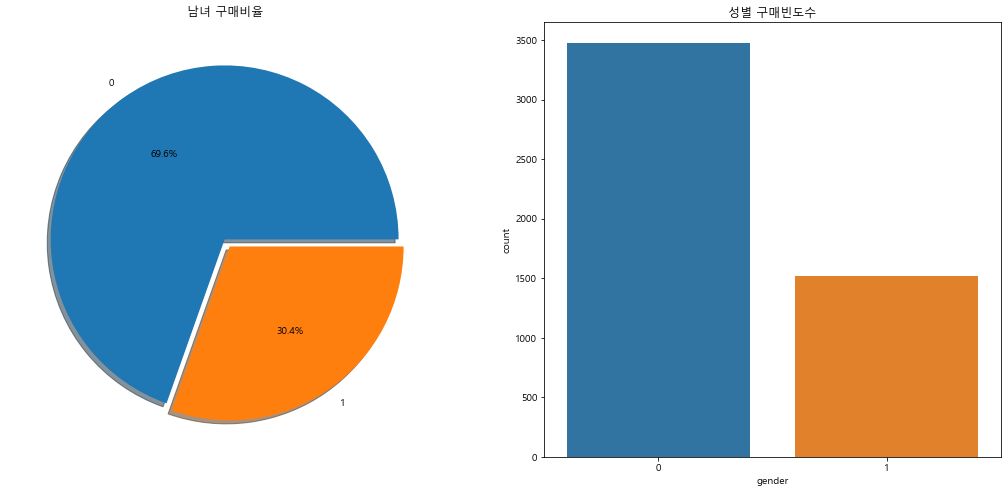

In [231]:
f, ax = plt.subplots(1,2,figsize=(18,8))

# 구매에 대한 남녀 빈도 체크
gender_freq = train.gender.value_counts()
gender_freq.plot.pie(explode=[0,0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('남녀 구매비율')
ax[0].set_ylabel('')

# 구매에 대한 남녀 빈도 체크 -> 히스토그램
sns.countplot('gender', data=train, ax=ax[1])
ax[1].set_title('성별 구매빈도수')
plt.show()

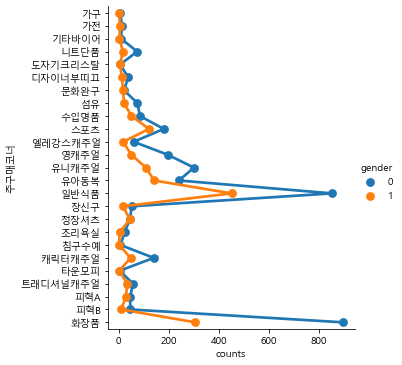

In [232]:
# 남녀별 주구매코너별 구매율
gender_catcnt = train.groupby(['gender', '주구매코너'])['custid'].agg('count').to_frame()
df_catecnt = gender_catcnt.reset_index()
df_catecnt.columns = ['gender', '주구매코너', 'counts']

sns.factorplot('counts', '주구매코너', hue='gender', data=df_catecnt)

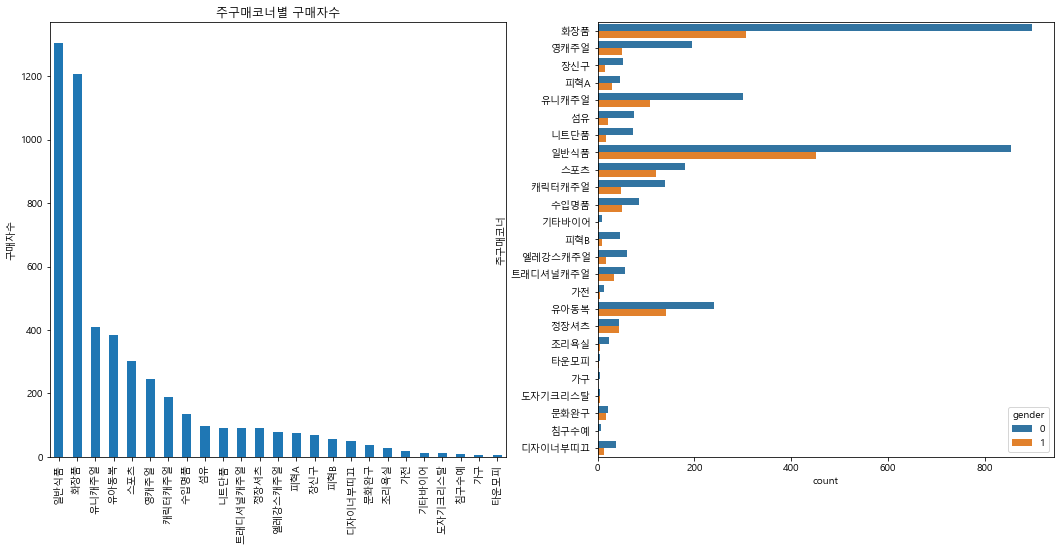

In [233]:
# 일반식품 -> 화장품 순으로 구매자수가 많음
# 여자는 화장품 -> 일반식풉 -> 유니캐주얼 순이고, 남자는 일반식품 -> 화장품 -> 유아동복 순으로 구매함.
f, ax = plt.subplots(1,2, figsize=(18,8))
train['주구매코너'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('주구매코너별 구매자수')
ax[0].set_ylabel('구매자수')
sns.countplot(y='주구매코너', hue='gender', data=train, ax=ax[1])
plt.show()

In [53]:
df = train.copy()

In [51]:
df.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A


In [54]:
df_sum = df.groupby('주구매코너')['구매건수'].sum()

In [55]:
df_sum.head()

주구매코너
가구          100
가전          315
기타바이어       149
니트단품       2542
도자기크리스탈     261
Name: 구매건수, dtype: int64

In [56]:
df_sum = df_sum.reset_index()
df_sum.columns = ['주구매코너', '코너별구매건']

In [58]:
df_sum

,주구매코너,코너별구매건
0,가구,100
1,가전,315
2,기타바이어,149
3,니트단품,2542
4,도자기크리스탈,261
5,디자이너부띠끄,2219
6,문화완구,848
7,섬유,1627
8,수입명품,4846
9,스포츠,10664


In [61]:
df.head(3)

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구


In [62]:
df_merge = df.merge(df_sum, how='left',on = '주구매코너')
df_merge

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,코너별구매건
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품,25740
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼,8285
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구,1165
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품,25740
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A,880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,13.0,33.0,14.0,33.0,8.0,41.0,44.0,일반식품,76174
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,4.0,6.0,6.0,1.0,3.0,NaN,14.0,디자이너부띠끄,2219
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,12.0,6.0,6.0,13.0,16.0,NaN,21.0,화장품,25740
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,6.0,4.0,2.0,1.0,NaN,2.0,11.0,피혁A,880


In [63]:
## 파생변수

features = []
f = df.groupby('custid')['구매건수'].agg([('코너별구매건수','sum')]).reset_index()
features.append(f)
f

,custid,코너별구매건수
0,18,15
1,21,9
2,23,36
3,26,28
4,35,5
...,...,...
4995,49952,93
4996,49954,17
4997,49957,37
4998,49975,13


In [64]:
f = df.groupby('custid')['총구매액'].agg([('코너별구매액', 'sum')]).reset_index()
features.append(f)
f

,custid,코너별구매액
0,18,680100
1,21,353450
2,23,5671400
3,26,1964000
4,35,885000
...,...,...
4995,49952,6666517
4996,49954,3112100
4997,49957,5852482
4998,49975,654498


In [65]:
f = df.groupby('custid')['평균구매가격'].agg([('평균할부개월수', 'mean')]).reset_index()
features.append(f); f

,custid,평균할부개월수
0,18,45340
1,21,39272
2,23,157539
3,26,70143
4,35,177000
...,...,...
4995,49952,71683
4996,49954,183065
4997,49957,158175
4998,49975,50346


In [66]:
features

[      custid  코너별구매건수
 0         18       15
 1         21        9
 2         23       36
 3         26       28
 4         35        5
 ...      ...      ...
 4995   49952       93
 4996   49954       17
 4997   49957       37
 4998   49975       13
 4999   49993       32
 
 [5000 rows x 2 columns],
       custid   코너별구매액
 0         18   680100
 1         21   353450
 2         23  5671400
 3         26  1964000
 4         35   885000
 ...      ...      ...
 4995   49952  6666517
 4996   49954  3112100
 4997   49957  5852482
 4998   49975   654498
 4999   49993  2554723
 
 [5000 rows x 2 columns],
       custid  평균할부개월수
 0         18    45340
 1         21    39272
 2         23   157539
 3         26    70143
 4         35   177000
 ...      ...      ...
 4995   49952    71683
 4996   49954   183065
 4997   49957   158175
 4998   49975    50346
 4999   49993    79835
 
 [5000 rows x 2 columns]]

In [67]:
df['custid'].value_counts(normalize=True)

18433    0.0002
21852    0.0002
19815    0.0002
32101    0.0002
3427     0.0002
          ...  
33441    0.0002
22090    0.0002
15006    0.0002
10908    0.0002
4094     0.0002
Name: custid, Length: 5000, dtype: float64

In [68]:
df.groupby('gender')['custid'].mean()

gender
0    22705.701064
1    30906.869822
Name: custid, dtype: float64

### Missing Values 처리

In [73]:
# 결측값 확인
# input : dataframe 객체
#   checkData : 확인할 데이터
#
# output : feature 별 null 값 건수
def have_missing_value(checkData):
    try:       
        
        data = checkData.isnull().sum();
        
        return data;
    except Exception as e:
        raise e

In [74]:
# 수치형 결측치 처리
# input : dataframe 객체
#   checkData : 확인할 데이터
#   cont       : 수치형 Features
#   imputeValue : 대체할 값  
# output : feature 별 null 값 건수
def Impute_missing_value_numeric(checkData, cont, imputeValue):
    try:
        
        data = checkData.fillna(value=imputeValue, inplace=True)
            
        return data;
    except Exception as e:
        raise e

In [75]:
# 범주형 결측치 One-hot encoding 처리
# input : dataframe 객체
#   checkData : 확인할 데이터
#   cate      : encoding 할 Feature 
# output : feature 별 null 값 건수
def Impute_missing_value_categorical(checkData, cate):
    try:
        
        for i in checkData[cate].dtypes.index:
            
            print("['"+ i +"'].astype('category').cat.categories")
            checkData[i].astype('category').cat.categories
            
            checkData[cate] = checkData[cate].apply(lambda x: x.astype('category').cat.codes)
        
        return  checkData
    except Exception as e:
        raise e

In [76]:
# Tomek links :  언더샘플링(Under-Sampling) : 다수 클래스 데이터에서 일부만 사용함
# input : X_train, y_train
#  X_train : 
#  y_train
# output : print
def under_Sampling_DecisionTree(X_train, y_train):
    try:
        XX, yy = TomekLinks().fit_sample(X_train, y_train)
        tree0 = DecisionTreeClassifier(max_depth=4, random_state=0)
        tree0.fit(XX, yy)
        y_pred0 = tree0.predict(X_test)

        print(classification_report(y_test, y_pred0))

    except Exception as e:
        raise e

In [77]:
# Smot+Tomek links :  복합샘플링(Combining Over-and Under-Sampling) 
# input : X_train, y_train
#  X_train : 
#  y_train
# output : print
def combining_Sampling_DecisionTree(X_train, y_train):
    try:
        XX, yy = SMOTETomek(random_state=0).fit_sample(X_train, y_train)

        tree3 = DecisionTreeClassifier(max_depth=4, random_state=0)
        tree3.fit(XX, yy)
        y_pred3 = tree3.predict(X_test)

        print(classification_report(y_test, y_pred3))

    except Exception as e:
        raise e

In [78]:
# Missing Values 확인
train_copy = train.copy() 
have_missing_value(train_copy)

custid          0
gender          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       945
겨울_구매건수       897
봄_구매건수        689
여름_구매건수      1022
아침_구매건수      1442
저녁_구매건수       967
점심_구매건수       145
주구매코너           0
dtype: int64

In [79]:
# Feature 정의
# 수치형 Features
cont = ['총구매액','구매건수','평균구매가격','평균할부개월수','내점일수',
       '수입상품_구매비율','주말방문비율', '봄_구매건수', '여름_구매건수',
       '가을_구매건수','겨울_구매건수','아침_구매건수', '점심_구매건수',
       '저녁_구매건수', '구매브랜드종류']
# 범주형 Features
cate = ['주구매코너']
# 비분석 Features : drop
delCols = ['custid']
# target Feature
dfy = 'gender'

In [81]:
trainData

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,13.0,33.0,14.0,33.0,8.0,41.0,44.0,일반식품
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,4.0,6.0,6.0,1.0,3.0,NaN,14.0,디자이너부띠끄
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,12.0,6.0,6.0,13.0,16.0,NaN,21.0,화장품
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,6.0,4.0,2.0,1.0,NaN,2.0,11.0,피혁A


In [82]:
# 대체값 0으로 수치형 Feature 결측치 처리 : 
Impute_missing_value_numeric(trainData, cont, 0)
have_missing_value(trainData)

custid       0
gender       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
dtype: int64

In [83]:
# 범주형 결측치 One-hot encoding 처리
dataP =Impute_missing_value_categorical(trainData, cate)

['주구매코너'].astype('category').cat.categories


In [84]:
# 학습용 데이터 확인
dataP.tail(3)

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,12.0,6.0,6.0,13.0,16.0,0.0,21.0,24
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,6.0,4.0,2.0,1.0,0.0,2.0,11.0,22
4999,49993,1,2554723,32,79835,1.7,9,26,21.9,34.6,6.0,5.0,10.0,11.0,8.0,5.0,19.0,14


In [88]:
df['gender'].value_counts(normalize=True)

0    0.6958
1    0.3042
Name: gender, dtype: float64

In [89]:
test['구매건수'].value_counts(normalize=True)

4      0.0322
10     0.0306
6      0.0296
7      0.0294
3      0.0294
        ...  
118    0.0002
417    0.0002
401    0.0002
305    0.0002
267    0.0002
Name: 구매건수, Length: 225, dtype: float64

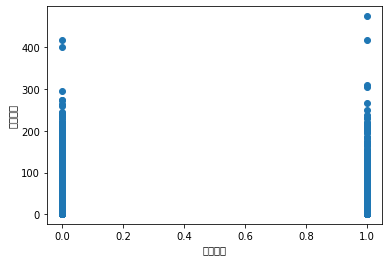

In [90]:
# gender와 구매건수의 산포도를 작성
plt.scatter(df['gender'], test['구매건수'])

plt.xlabel('구매건수')
plt.ylabel('구매건수')
plt.show()

In [93]:
# 주구매코너의 레이블
주구매코너_label = df['주구매코너']\
        .value_counts(ascending=False, normalize=True)\
        .index
# 주구매코너의 값
주구매코너_vals = df['주구매코너']\
        .value_counts(ascending=False, normalize=True)\
        .values

In [94]:
주구매코너_label

Index(['일반식품', '화장품', '유니캐주얼', '유아동복', '스포츠', '영캐주얼', '캐릭터캐주얼', '수입명품', '섬유',
       '니트단품', '트래디셔널캐주얼', '정장셔츠', '엘레강스캐주얼', '피혁A', '장신구', '피혁B', '디자이너부띠끄',
       '문화완구', '조리욕실', '가전', '기타바이어', '도자기크리스탈', '침구수예', '가구', '타운모피'],
      dtype='object')

In [95]:
주구매코너_vals

array([0.2612, 0.2412, 0.082 , 0.0766, 0.0602, 0.0492, 0.0376, 0.0272,
       0.0192, 0.0182, 0.0182, 0.018 , 0.0156, 0.015 , 0.0136, 0.0112,
       0.0102, 0.0076, 0.0056, 0.0036, 0.0024, 0.0022, 0.0016, 0.0014,
       0.0012])

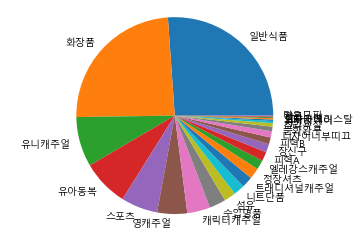

In [291]:
# 주구매코너의 원그래프를 작성
plt.pie(주구매코너_vals, labels=주구매코너_label)
plt.axis('equal') 
plt.show()

### Features engineering

In [99]:
dt0 = dataP.groupby(['주구매코너'])['구매건수'].agg(sum)   
df0 = dt0.to_frame().reset_index()
df0.columns = ['주구매코너', '코너별구매건']
#df0.head(3)
dataP_ = pd.merge(dataP, df0, on='주구매코너')
# dataP_.head()
print(dataP_[(dataP_['주구매코너']==1)].groupby(['gender'])['총구매액'].agg(sum))
print(dataP_[(dataP_['주구매코너']==1)].groupby(['gender'])['구매건수'].agg(sum))
dataP_.head()

gender
0    31111117
1    29039091
Name: 총구매액, dtype: int64
gender
0    214
1    101
Name: 구매건수, dtype: int64


,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,코너별구매건
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,0.0,9.0,6.0,0.0,0.0,6.0,9.0,24,25740
1,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,0.0,0.0,18.0,10.0,24,25740
2,82,0,752200,5,150440,2.6,5,3,60.0,100.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,24,25740
3,92,0,1145400,13,88108,1.9,7,9,23.1,22.2,1.0,0.0,2.0,10.0,1.0,8.0,4.0,24,25740
4,100,0,442160,16,27635,1.0,10,6,25.0,33.3,0.0,5.0,11.0,0.0,0.0,3.0,13.0,24,25740


In [100]:
# 건수 Feature들을 최소단위 정보인 구매건당 구매액로 변경
def createFeatures(df_p):
    df_p['아침구매액'] = np.round(df_p['총구매액']*(df_p['아침_구매건수'] /df_p['구매건수'] ), 3)
    df_p['점심구매액'] = np.round(df_p['총구매액']*(df_p['점심_구매건수'] /df_p['구매건수'] ), 3)
    df_p['저녁구매액'] = np.round(df_p['총구매액']*(df_p['저녁_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['봄구매액']   = np.round(df_p['총구매액']*(df_p['봄_구매건수'] /df_p['구매건수'] ), 3) 
    df_p['여름구매액'] = np.round(df_p['총구매액']*(df_p['여름_구매건수'] /df_p['구매건수'] ), 3) 
    df_p['가을구매액'] = np.round(df_p['총구매액']*(df_p['가을_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['겨울구매액'] = np.round(df_p['총구매액']*(df_p['겨울_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['내점구매율'] = np.round(df_p['구매건수'] /df_p['내점일수'], 3)

def dropFeatures(df_p):
    drop_cols = ['아침_구매건수', '점심_구매건수', '저녁_구매건수', '총구매액', '구매건수',
         '봄_구매건수', '여름_구매건수', '가을_구매건수', '겨울_구매건수', '내점일수'] 
    
    return df_p.drop(drop_cols, axis=1)

createFeatures(dataP_)
dataPP = dropFeatures(dataP_) 
dataPP[(dataPP['주구매코너']==2)].head()

,custid,gender,평균구매가격,평균할부개월수,구매브랜드종류,수입상품_구매비율,주말방문비율,주구매코너,코너별구매건,아침구매액,점심구매액,저녁구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율
4123,363,0,90960,3.0,4,20.0,25.0,2,149,0.000,90960.000,363840.000,454800.000,0.000,0.000,0.000,1.250
4124,4822,0,248049,2.3,10,10.5,33.3,2,149,992196.632,3224639.053,496098.316,744147.474,992196.632,1736344.105,1240245.789,1.583
4125,11617,1,124767,3.8,8,25.0,62.5,2,149,124766.667,499066.667,873366.667,249533.333,499066.667,748600.000,0.000,1.500
4126,12979,0,79250,1.7,10,0.0,33.3,2,149,554750.000,396250.000,0.000,158500.000,0.000,792500.000,0.000,4.000
4127,16414,0,31625,1.0,6,12.5,14.3,2,149,63250.000,189750.000,0.000,94875.000,158125.000,0.000,0.000,1.143


In [101]:
import seaborn as sns

In [228]:
plt.rcParams['font.family'] = 'Malgun Gothic'

<AxesSubplot:>

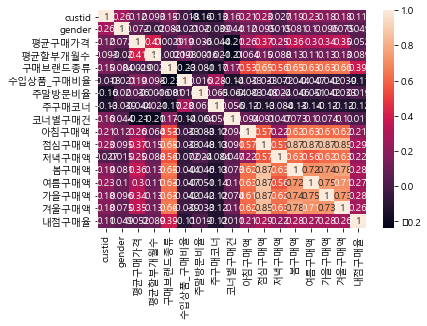

In [229]:
sns.heatmap(dataPP.corr(), annot=True)

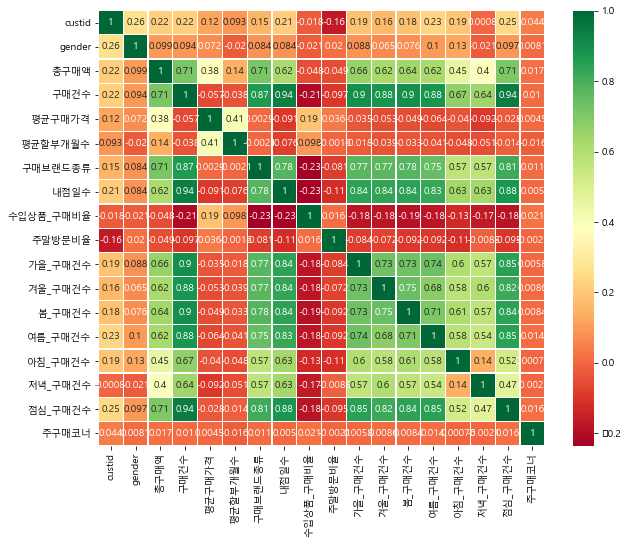

In [230]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [142]:
df.shape

(5000, 18)

In [143]:
obj = ['주구매코너']

In [144]:
df[obj].head()

,주구매코너
0,화장품
1,영캐주얼
2,장신구
3,화장품
4,피혁A


In [145]:
df[obj] = test[obj].apply(lambda x: x.astype('category').cat.codes)

In [146]:
df[obj].head()

,주구매코너
0,15
1,13
2,13
3,8
4,9


In [147]:
df_drop = df.dropna(subset=['가을_구매건수','겨울_구매건수','봄_구매건수','여름_구매건수','아침_구매건수','저녁_구매건수','점심_구매건수' ])
df_drop.shape

(5000, 18)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    5000 non-null   float64
 11  겨울_구매건수    5000 non-null   float64
 12  봄_구매건수     5000 non-null   float64
 13  여름_구매건수    5000 non-null   float64
 14  아침_구매건수    5000 non-null   float64
 15  저녁_구매건수    5000 non-null   float64
 16  점심_구매건수    5000 non-null   float64
 17  주구매코너      5000 non-null   int8   
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


In [149]:
df.isnull().sum()

custid       0
gender       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
dtype: int64

In [150]:
from sklearn.impute import SimpleImputer
imputer_drop_cols = SimpleImputer(strategy="most_frequent")  
imputer_drop_cols.fit(df[drop_cols])

SimpleImputer(strategy='most_frequent')

In [151]:
from sklearn.impute import SimpleImputer
imputer_drop_cols = SimpleImputer(strategy="most_frequent")  
imputer_drop_cols.fit(df[drop_cols])

SimpleImputer(strategy='most_frequent')

In [152]:
x = imputer_drop_cols.transform(df[drop_cols])
x

array([[ 6.,  1.,  9., ...,  9.,  6.,  1.],
       [ 4.,  1.,  5., ...,  6.,  1.,  3.],
       [12.,  1., 17., ..., 15., 11., 10.],
       ...,
       [ 6., 13.,  6., ..., 21.,  1., 16.],
       [ 2.,  1.,  4., ..., 11.,  2.,  1.],
       [10., 11.,  5., ..., 19.,  5.,  8.]])

In [153]:
y = imputer_drop_cols.transform(df[drop_cols])
y

array([[ 6.,  1.,  9., ...,  9.,  6.,  1.],
       [ 4.,  1.,  5., ...,  6.,  1.,  3.],
       [12.,  1., 17., ..., 15., 11., 10.],
       ...,
       [ 6., 13.,  6., ..., 21.,  1., 16.],
       [ 2.,  1.,  4., ..., 11.,  2.,  1.],
       [10., 11.,  5., ..., 19.,  5.,  8.]])

In [154]:
df[drop_cols] = x
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    5000 non-null   float64
 11  겨울_구매건수    5000 non-null   float64
 12  봄_구매건수     5000 non-null   float64
 13  여름_구매건수    5000 non-null   float64
 14  아침_구매건수    5000 non-null   float64
 15  저녁_구매건수    5000 non-null   float64
 16  점심_구매건수    5000 non-null   float64
 17  주구매코너      5000 non-null   int8   
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


In [155]:
dfX = df.drop(['gender','custid'], axis=1) 
dfy = df['gender']

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
model = LogisticRegression()

In [129]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [130]:
scores = cross_val_score(model, dfX, dfy); scores

array([nan, nan, nan, nan, nan])

In [156]:
print("Mean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(), scores.std(), scores.min(), scores.max()))

Mean: nan
Std: nan
Min: nan
Max: nan


In [157]:
df['gender'].value_counts()

0    3479
1    1521
Name: gender, dtype: int64

### dataPP를 사용하여 기본학습, 엔지니어링 후 학습

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    dfX, dfy, random_state=0)

In [159]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

In [160]:
X_train_fs= X_train.values

In [161]:
y_train_fs = y_train.values

In [162]:
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score

# K-Fold교차 검증
kf = KFold(n_splits=10, shuffle=True)
# 모델의 정밀도를 보존하기 위한 준비
scores = []
# 데이터를 셔플하고, 훈련데이터와 테스트 데이터를 분활
for train_id, test_id in kf.split(X_train_fs):
    # 훈련 데이터를 사용한 모델을 작성
    x = X_train_fs[train_id]
    y = y_train_fs[train_id]
    clf = tree.DecisionTreeClassifier()
    clf.fit(x,y)
    # 테스트 데이터에 모델을 적용
    pred_y = clf.predict(X_train_fs[test_id])
    # 모델의 정밀도를 계산하고 보존
    score = accuracy_score(y_train_fs[test_id], pred_y)
    scores.append(score)

# 모델의 평균정밀도, 표준편차를 확인
scores = np.array(scores)
print(scores.mean(), scores.std())

0.5901333333333334 0.022312527622142874


In [163]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# 재현률, 적합률의 확인
#print(confusion_matrix(Y[test_id], pred_y))
print(recall_score(y_train_fs[test_id], pred_y))
print(precision_score(y_train_fs[test_id], pred_y))

0.3805309734513274
0.4056603773584906


In [164]:
from sklearn.model_selection import GridSearchCV

# 패러메터의 범위설정
params = {
    'criterion': ['entropy'],    
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [10, 20, 30, 40, 50],
}

# 그리드 서치의 실행조건을 설정
clf_gs = GridSearchCV(tree.DecisionTreeClassifier(), params, 
                      cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')

# 그리드 서치 실행
clf_gs.fit(X_train_fs, y_train_fs)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [165]:
print(clf_gs.best_score_)
print(clf_gs.best_params_)

0.6877333333333333
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 40}


In [166]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [167]:
fpr, tpr, _ = roc_curve(y_train_fs[test_id], clf_gs.predict_proba(X_train_fs[test_id])[:,1])
auc(fpr, tpr)

0.6764844963858677

### Cross-Validation

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [169]:
model = LogisticRegression()

In [170]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [171]:
scores = cross_val_score(model, dfX, dfy); scores

array([0.696, 0.697, 0.695, 0.697, 0.695])

In [172]:
print("Mean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(), scores.std(), scores.min(), scores.max()))

Mean: 0.696
Std: 0.001
Min: 0.695
Max: 0.697


In [174]:
from imblearn.under_sampling import *
from imblearn.combine import SMOTETomek

In [175]:
scores = cross_val_score(model, dfX, dfy); scores

array([0.696, 0.697, 0.695, 0.697, 0.695])

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [177]:
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

In [178]:
tree3 = DecisionTreeClassifier(max_depth=4, random_state=0)

tree3.fit(X_train, y_train)
y_pred3 = tree3.predict(X_test)

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.71      0.98      0.82       883
           1       0.34      0.03      0.06       367

    accuracy                           0.70      1250
   macro avg       0.53      0.50      0.44      1250
weighted avg       0.60      0.70      0.60      1250



In [179]:
from imblearn.under_sampling import TomekLinks

In [180]:
XX, yy = TomekLinks().fit_sample(X_train, y_train)
tree0 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree0.fit(XX, yy)
y_pred0 = tree0.predict(X_test)
print(classification_report(y_test, y_pred0))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76       883
           1       0.28      0.16      0.20       367

    accuracy                           0.63      1250
   macro avg       0.49      0.49      0.48      1250
weighted avg       0.58      0.63      0.60      1250



In [181]:
XX, yy = SMOTETomek(random_state=0).fit_sample(X_train, y_train)

In [182]:
tree3 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree3.fit(XX, yy)
y_pred3 = tree3.predict(X_test)

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.74      0.62      0.67       883
           1       0.34      0.47      0.39       367

    accuracy                           0.57      1250
   macro avg       0.54      0.54      0.53      1250
weighted avg       0.62      0.57      0.59      1250



In [183]:
tree3.score(X_test,y_test)

0.5736

In [184]:
from sklearn.dummy import DummyClassifier
print(y_test.value_counts())
DummyClassifier(strategy='most_frequent').fit(X_train, y_train).score(X_test, y_test)

0    883
1    367
Name: gender, dtype: int64


0.7064

### xgboost

In [185]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [186]:
import xgboost as xgb
from xgboost import plot_importance
#import pan
import numpy as np

In [187]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [188]:
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

In [189]:

# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기
wlist = [(dtrain, 'train'),(dtest, 'eval')]
# 하이퍼 파라미터와 early stoppinig 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[21:23:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.67505	eval-logloss:0.67724
[1]	train-logloss:0.66029	eval-logloss:0.66433
[2]	train-logloss:0.64785	eval-logloss:0.65299
[3]	train-logloss:0.63751	eval-logloss:0.64465
[4]	train-logloss:0.62885	eval-logloss:0.63681
[5]	train-logloss:0.62156	eval-logloss:0.63083
[6]	train-logloss:0.61533	eval-logloss:0.62579
[7]	train-logloss:0.61007	eval-logloss:0.62185
[8]	train-logloss:0.60561	eval-logloss:0.61891
[9]	train-logloss:0.60174	eval-logloss:0.61661
[10]	train-logloss:0.59831	eval-logloss:0.61436
[11]	train-logloss:0.59562	eval-logloss:0.61272
[12]	train-logloss:0.59302	eval-logloss:0

[162]	train-logloss:0.50097	eval-logloss:0.60843
[163]	train-logloss:0.50040	eval-logloss:0.60844
[164]	train-logloss:0.49977	eval-logloss:0.60889
[165]	train-logloss:0.49895	eval-logloss:0.60918
[166]	train-logloss:0.49828	eval-logloss:0.60916
[167]	train-logloss:0.49767	eval-logloss:0.60940
[168]	train-logloss:0.49710	eval-logloss:0.60913
[169]	train-logloss:0.49681	eval-logloss:0.60890
[170]	train-logloss:0.49638	eval-logloss:0.60888
[171]	train-logloss:0.49600	eval-logloss:0.60911
[172]	train-logloss:0.49564	eval-logloss:0.60932
[173]	train-logloss:0.49523	eval-logloss:0.60976
[174]	train-logloss:0.49500	eval-logloss:0.60963
[175]	train-logloss:0.49462	eval-logloss:0.60977
[176]	train-logloss:0.49412	eval-logloss:0.60976
[177]	train-logloss:0.49371	eval-logloss:0.61014
[178]	train-logloss:0.49319	eval-logloss:0.61041
[179]	train-logloss:0.49259	eval-logloss:0.61029
[180]	train-logloss:0.49243	eval-logloss:0.61043
[181]	train-logloss:0.49229	eval-logloss:0.61040
[182]	train-logloss:

[330]	train-logloss:0.44181	eval-logloss:0.62503
[331]	train-logloss:0.44142	eval-logloss:0.62509
[332]	train-logloss:0.44115	eval-logloss:0.62519
[333]	train-logloss:0.44077	eval-logloss:0.62550
[334]	train-logloss:0.44043	eval-logloss:0.62570
[335]	train-logloss:0.44016	eval-logloss:0.62594
[336]	train-logloss:0.44004	eval-logloss:0.62608
[337]	train-logloss:0.43974	eval-logloss:0.62625
[338]	train-logloss:0.43963	eval-logloss:0.62607
[339]	train-logloss:0.43946	eval-logloss:0.62606
[340]	train-logloss:0.43911	eval-logloss:0.62613
[341]	train-logloss:0.43888	eval-logloss:0.62622
[342]	train-logloss:0.43851	eval-logloss:0.62601
[343]	train-logloss:0.43836	eval-logloss:0.62613
[344]	train-logloss:0.43817	eval-logloss:0.62586
[345]	train-logloss:0.43782	eval-logloss:0.62625
[346]	train-logloss:0.43714	eval-logloss:0.62626
[347]	train-logloss:0.43668	eval-logloss:0.62638
[348]	train-logloss:0.43643	eval-logloss:0.62633
[349]	train-logloss:0.43632	eval-logloss:0.62632
[350]	train-logloss:

In [190]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.262 0.325 0.254 0.245 0.263 0.176 0.116 0.113 0.155 0.297]


In [191]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [192]:
get_clf_eval(y_test, preds)

오차행렬
[[790  93]
 [307  60]]
정확도: 0.6800, 정밀도: 0.3922, 재현율: 0.1635


In [193]:
XX.columns

Index(['총구매액', '구매건수', '평균구매가격', '평균할부개월수', '구매브랜드종류', '내점일수', '수입상품_구매비율',
       '주말방문비율', '가을_구매건수', '겨울_구매건수', '봄_구매건수', '여름_구매건수', '아침_구매건수',
       '저녁_구매건수', '점심_구매건수', '주구매코너'],
      dtype='object')

In [194]:
col = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n','o','p']

In [195]:
XX.head()

,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,404285,3,134762,2.3,3,2,33.3,0.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,24
1,2407157,32,75224,1.7,22,17,9.4,52.9,3.0,3.0,6.0,20.0,3.0,8.0,21.0,14
2,4664283,78,59798,1.8,24,22,1.3,45.5,17.0,12.0,29.0,20.0,1.0,23.0,55.0,14
3,3299200,11,299927,1.9,9,3,45.5,33.3,1.0,1.0,11.0,1.0,1.0,1.0,11.0,8
4,555480,5,111096,2.6,4,4,20.0,75.0,2.0,1.0,1.0,3.0,1.0,3.0,2.0,8


In [196]:
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(nestimators=400)
evals = [(X_test, y_test)]
lgbm_wrapper.fit(XX, yy, feature_name=col, early_stopping_rounds=100, 
                 eval_metric="logloss", eval_set=evals, verbose=True)
pred = lgbm_wrapper.predict(X_test)

[LightGBM] [Warning] Unknown parameter: nestimators
[1]	valid_0's binary_logloss: 0.685737
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.681087
[3]	valid_0's binary_logloss: 0.673717
[4]	valid_0's binary_logloss: 0.66731
[5]	valid_0's binary_logloss: 0.664474
[6]	valid_0's binary_logloss: 0.66174
[7]	valid_0's binary_logloss: 0.658726
[8]	valid_0's binary_logloss: 0.656117
[9]	valid_0's binary_logloss: 0.655762
[10]	valid_0's binary_logloss: 0.65431
[11]	valid_0's binary_logloss: 0.65456
[12]	valid_0's binary_logloss: 0.653308
[13]	valid_0's binary_logloss: 0.653015
[14]	valid_0's binary_logloss: 0.652706
[15]	valid_0's binary_logloss: 0.653057
[16]	valid_0's binary_logloss: 0.65189
[17]	valid_0's binary_logloss: 0.651609
[18]	valid_0's binary_logloss: 0.648788
[19]	valid_0's binary_logloss: 0.648622
[20]	valid_0's binary_logloss: 0.646436
[21]	valid_0's binary_logloss: 0.646507
[22]	valid_0's binary_logloss: 0.645859
[23]	valid_0's binar

In [197]:
get_clf_eval(y_test, preds)

오차행렬
[[790  93]
 [307  60]]
정확도: 0.6800, 정밀도: 0.3922, 재현율: 0.1635


### Features engineering

In [198]:
# 학습용 데이터에 '코너별구매건' 컬럼 추가

dt0 = dataP.groupby(['주구매코너'])['구매건수'].agg(sum)   
df0 = dt0.to_frame().reset_index()
df0.columns = ['주구매코너', '코너별구매건']
#df0.head(3)
dataP_ = pd.merge(dataP, df0, on='주구매코너')
# dataP_.head()
print(dataP_[(dataP_['주구매코너']==1)].groupby(['gender'])['총구매액'].agg(sum))
print(dataP_[(dataP_['주구매코너']==1)].groupby(['gender'])['구매건수'].agg(sum))
dataP_.head()

gender
0    31111117
1    29039091
Name: 총구매액, dtype: int64
gender
0    214
1    101
Name: 구매건수, dtype: int64


,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,코너별구매건
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,0.0,9.0,6.0,0.0,0.0,6.0,9.0,24,25740
1,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,0.0,0.0,18.0,10.0,24,25740
2,82,0,752200,5,150440,2.6,5,3,60.0,100.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,24,25740
3,92,0,1145400,13,88108,1.9,7,9,23.1,22.2,1.0,0.0,2.0,10.0,1.0,8.0,4.0,24,25740
4,100,0,442160,16,27635,1.0,10,6,25.0,33.3,0.0,5.0,11.0,0.0,0.0,3.0,13.0,24,25740


In [199]:
# 건수 Feature들을 최소단위 정보인 구매건당 구매액로 변경
def createFeatures(df_p):
    df_p['아침구매액'] = np.round(df_p['총구매액']*(df_p['아침_구매건수'] /df_p['구매건수'] ), 3)
    df_p['점심구매액'] = np.round(df_p['총구매액']*(df_p['점심_구매건수'] /df_p['구매건수'] ), 3)
    df_p['저녁구매액'] = np.round(df_p['총구매액']*(df_p['저녁_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['봄구매액']   = np.round(df_p['총구매액']*(df_p['봄_구매건수'] /df_p['구매건수'] ), 3) 
    df_p['여름구매액'] = np.round(df_p['총구매액']*(df_p['여름_구매건수'] /df_p['구매건수'] ), 3) 
    df_p['가을구매액'] = np.round(df_p['총구매액']*(df_p['가을_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['겨울구매액'] = np.round(df_p['총구매액']*(df_p['겨울_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['내점구매율'] = np.round(df_p['구매건수'] /df_p['내점일수'], 3)

def dropFeatures(df_p):
    drop_cols = ['아침_구매건수', '점심_구매건수', '저녁_구매건수', '총구매액', '구매건수',
         '봄_구매건수', '여름_구매건수', '가을_구매건수', '겨울_구매건수', '내점일수'] 
    
    return df_p.drop(drop_cols, axis=1)

createFeatures(dataP_)
dataPP = dropFeatures(dataP_) 
dataPP[(dataPP['주구매코너']==2)].head()

,custid,gender,평균구매가격,평균할부개월수,구매브랜드종류,수입상품_구매비율,주말방문비율,주구매코너,코너별구매건,아침구매액,점심구매액,저녁구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율
4123,363,0,90960,3.0,4,20.0,25.0,2,149,0.000,90960.000,363840.000,454800.000,0.000,0.000,0.000,1.250
4124,4822,0,248049,2.3,10,10.5,33.3,2,149,992196.632,3224639.053,496098.316,744147.474,992196.632,1736344.105,1240245.789,1.583
4125,11617,1,124767,3.8,8,25.0,62.5,2,149,124766.667,499066.667,873366.667,249533.333,499066.667,748600.000,0.000,1.500
4126,12979,0,79250,1.7,10,0.0,33.3,2,149,554750.000,396250.000,0.000,158500.000,0.000,792500.000,0.000,4.000
4127,16414,0,31625,1.0,6,12.5,14.3,2,149,63250.000,189750.000,0.000,94875.000,158125.000,0.000,0.000,1.143


In [200]:
# 학습용 데이터 확정

dataPT = dataPP.copy()
dataPD = dataPT.drop(['주말방문비율', '저녁구매액', '평균할부개월수','수입상품_구매비율','주구매코너'], axis=1)

dfy = dataPD['gender']
dfX = dataPD.drop('gender', axis=1)
dfX.tail(2)

,custid,평균구매가격,구매브랜드종류,코너별구매건,아침구매액,점심구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율
4998,49732,314259,23,2219,1.477015e+07,3.928233e+07,8484982.398,2.388365e+07,1.445590e+07,1.319886e+07,2.449
4999,49954,183065,10,2219,5.491941e+05,2.562906e+06,1098388.235,1.830647e+05,7.322588e+05,1.098388e+06,1.308


In [201]:
X_train.head(2)

,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
4154,404285,3,134762,2.3,3,2,33.3,0.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,24
4820,6169420,38,162353,2.1,29,26,13.2,34.6,8.0,13.0,7.0,10.0,13.0,1.0,25.0,10


In [202]:
dfX.shape

(5000, 11)

### 전개(Deployment)

In [205]:
# 1. 예측용 데이터를 로드한다.
news = pd.read_csv('test.csv', encoding='CP949')
newsP = news.copy()
newsP.head(2)

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,장신구
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,유아동복


In [206]:
have_missing_value(newsP)

custid          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       948
겨울_구매건수       911
봄_구매건수        681
여름_구매건수       991
아침_구매건수      1392
저녁_구매건수      1025
점심_구매건수       139
주구매코너           0
dtype: int64

In [207]:
# 2. 예측용 데이터 결측치 처리 및 비분석 컬럼 삭제 
newsP.fillna(value=0, inplace=True)

for col in newsP[cate].dtypes.index:
    print("newsP['"+ col +"'].astype('category').cat.categories")
    newsP[col].astype('category').cat.categories

newsP[cate] = newsP[cate].apply(lambda x: x.astype('category').cat.codes)
newsP.tail(3)

newsP['주구매코너'].astype('category').cat.categories


,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
4997,104998,960923,12,80077,1.8,7,7,0.0,42.9,4.0,1.0,6.0,1.0,0.0,0.0,12.0,14
4998,104999,786600,14,56186,1.7,12,9,14.3,55.6,0.0,7.0,4.0,3.0,2.0,4.0,8.0,24
4999,105000,2568073,76,33790,1.6,23,35,10.5,22.9,23.0,20.0,9.0,24.0,11.0,4.0,61.0,14


In [208]:
# 3. 예측용 데이터에 '코너별구매건' 컬럼 추가
nd0 = newsP.groupby(['주구매코너'])['구매건수'].agg(sum)   
nd0 = nd0.to_frame().reset_index()
nd0.columns = ['주구매코너', '코너별구매건']
# nd0.head(3)
newsP_ = pd.merge(newsP, nd0, on='주구매코너')
# newsP_.head(2)

# 4. 예측용 데이터의 건수 Feature들을 최소단위 정보인 구매건당 구매액로 변경한다.
createFeatures(newsP_)
newsPP = dropFeatures(newsP_) # 파생 Feature -> 유도 Feature들 삭제
# newsPP[(newsPP['주구매코너']==2)].head(3)

# 5. 머신러닝 예측용 데이터 변환 완료
X_pred = newsPP.drop(['주말방문비율', '저녁구매액', '평균할부개월수','수입상품_구매비율','주구매코너'], axis=1)
X_pred.tail(2)

,custid,평균구매가격,구매브랜드종류,코너별구매건,아침구매액,점심구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율
4998,104474,107060,15,319,107060.0,1284720.0,428240.0,321180.0,749420.0,107060.0,1.5
4999,104752,63625,8,319,0.0,381750.0,254500.0,254500.0,0.0,0.0,2.0


### Best Model training

In [209]:
best_model1 = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
         importance_type='split', lambda_l1=0.01, lambda_l2=0,
         learning_rate=0.01, max_depth=50, metric='auc',
         min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
         min_split_gain=0.0, n_estimators=300, n_jobs=-1,
         num_boost_round=4000, num_leaves=150, objective='binary',
         random_state=0, reg_alpha=0.1, reg_lambda=0.0, silent=True,
         subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

score_best1 = best_model1.fit(X_train, y_train).score(X_test, y_test)
y_best1 = best_model1.predict(X_test)

print("best_model1 -----------------------------{}".format(score_best1))
print(classification_report(y_test, y_best1))

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.01, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0.01
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] num_iterations is set=4000, num_boost_round=4000 will be ignored. Current value: num_iterations=4000
best_model1 -----------------------------0.648
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       883
           1       0.33      0.19      0.24       367

    accuracy                           0.65      1250
   macro avg       0.52      0.52      0.51      1250
weighted avg       0.60      0.65      0.62      1250



In [210]:
best_model2 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bytree=1, gamma=0, learning_rate=0.07, max_delta_step=0,
        max_depth=7, min_child_weight=1, missing=None, n_estimators=700,
        n_jobs=1, nthread=3, objective='binary:logistic', random_state=0,
        reg_alpha=0.01, reg_lambda=0.1, scale_pos_weight=1, seed=None,
        silent=True, subsample=1)

score_best2 = best_model2.fit(X_train, y_train).score(X_test, y_test)
y_best2 = best_model2.predict(X_test)

print("best_model2 -----------------------------{}".format(score_best2))
print(classification_report(y_test, y_best2))

[21:29:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:29:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best_model2 -----------------------------0.6584
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       883
           1       0.35      0.19      0.25       367

    accuracy                           0.66      1250
   macro avg       0.53      0.52      0

In [219]:
new_D = X_pred.copy()
new_T = dataPT.drop(['주말방문비율', '저녁구매액', '평균할부개월수','수입상품_구매비율','주구매코너'], axis=1)
new_T = new_T.drop('gender', axis=1)
new_T.tail(2)

,custid,평균구매가격,구매브랜드종류,코너별구매건,아침구매액,점심구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율
4998,49732,314259,23,2219,1.477015e+07,3.928233e+07,8484982.398,2.388365e+07,1.445590e+07,1.319886e+07,2.449
4999,49954,183065,10,2219,5.491941e+05,2.562906e+06,1098388.235,1.830647e+05,7.322588e+05,1.098388e+06,1.308


In [220]:
display(dfX.shape, new_T.shape)

(5000, 11)

(5000, 11)

In [214]:
news.sort_values(by=['custid']).tail(3)

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
4997,104998,960923,12,80077,1.8,7,7,0.0,42.9,4.0,1.0,6.0,1.0,NaN,NaN,12.0,일반식품
4998,104999,786600,14,56186,1.7,12,9,14.3,55.6,NaN,7.0,4.0,3.0,2.0,4.0,8.0,화장품
4999,105000,2568073,76,33790,1.6,23,35,10.5,22.9,23.0,20.0,9.0,24.0,11.0,4.0,61.0,일반식품


In [215]:
new_D.sort_values(by=['custid']).tail(3)

,custid,평균구매가격,구매브랜드종류,코너별구매건,아침구매액,점심구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율
2423,104998,80077,7,74942,0.000,960923.000,480461.500,80076.917,320307.667,80076.917,1.714
3743,104999,56186,12,26123,112371.429,449485.714,224742.857,168557.143,0.000,393300.000,1.556
2424,105000,33790,23,74942,371694.776,2061216.487,304113.908,810970.421,777179.987,675808.684,2.171


### 남녀 비율 조정

In [234]:
df['gender'].value_counts()

0    3479
1    1521
Name: gender, dtype: int64

In [235]:
from sklearn.dummy import DummyClassifier
print(y_test.value_counts())
DummyClassifier(strategy='most_frequent').fit(X_train, y_train).score(X_test, y_test)

0    883
1    367
Name: gender, dtype: int64


0.7064

In [261]:
# 불균형 데이터 세트에 대한 언더 샘플링
from imblearn.under_sampling import RandomUnderSampler

# 오버 샘플링
from imblearn.over_sampling import RandomOverSampler

In [264]:
X = np.array(df.drop('gender', axis=1))
X

array([[1.800000e+01, 6.801000e+05, 1.500000e+01, ..., 6.000000e+00,
        9.000000e+00, 1.500000e+01],
       [2.100000e+01, 3.534500e+05, 9.000000e+00, ..., 1.000000e+00,
        6.000000e+00, 1.300000e+01],
       [2.300000e+01, 5.671400e+06, 3.600000e+01, ..., 1.100000e+01,
        1.500000e+01, 1.300000e+01],
       ...,
       [4.995700e+04, 5.852482e+06, 3.700000e+01, ..., 1.000000e+00,
        2.100000e+01, 1.400000e+01],
       [4.997500e+04, 6.544980e+05, 1.300000e+01, ..., 2.000000e+00,
        1.100000e+01, 2.400000e+01],
       [4.999300e+04, 2.554723e+06, 3.200000e+01, ..., 5.000000e+00,
        1.900000e+01, 1.400000e+01]])

In [266]:
Y = np.array(df['gender'])
Y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [267]:
# gender가 1과 0인 데이터의 건수를 카운트
print(np.sum(Y == 1), np.sum(Y == 0))

1521 3479


In [268]:
# gender가 1인 데이터의 건수에 맞춰서 다운사이징
sampler = RandomUnderSampler(random_state=42)
X, Y = sampler.fit_resample(X, Y)

In [269]:
# gender가 1과 0인 데이터의 건수를 카운트
print(np.sum(Y == 1), np.sum(Y == 0))

1521 1521


In [243]:
#결정트리의 작성과 검증
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score

In [244]:
# K-Fold 교차검증
# 10개의 테스터 데이터셋으로 구성된 데이터셋으로 나누고 각각의 데이터셋을 섞어준다.
kf = KFold(n_splits=10, shuffle=True)

In [245]:
kf

KFold(n_splits=10, random_state=None, shuffle=True)

In [270]:
# 모델의 정밀도를 보존할 준비
scores = []

In [271]:
# 데이터를 셔플하고, 훈련데이터와 테스트데이트로 분할
for train_id, test_id in kf.split(X):
    # 훈련 데이터를 사용하여 모델을 작성
    x = X[train_id]
    y = Y[train_id]
    clf = tree.DecisionTreeClassifier()
    clf.fit(x,y)
    # 테스트 데이터에 모델을 적용
    pred_y = clf.predict(X[test_id])
    # 모델의 정밀도를 계산해서 보존
    score = accuracy_score(Y[test_id], pred_y)
    scores.append(score)

# 모델의 평균정밀도, 표준편차를 확인
scores = np.array(scores)
print(scores.mean(), scores.std(), scores.max(), scores.min())

0.5762424503882657 0.03356462235358835 0.6381578947368421 0.5296052631578947


In [272]:
# Scikit-learn의 로드
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# 재현률, 적합도의 확인
#print(confusion_matrix(Y[test_id], pred_y))
print(recall_score(Y[test_id], pred_y))
print(precision_score(Y[test_id], pred_y))

0.5821917808219178
0.551948051948052


### 모델튜닝

In [274]:
# 모델작성용 파라미터 확인
print(clf)

DecisionTreeClassifier()


In [276]:
# 그리드 서치를 사용한 모델의 성능 개선
from sklearn.model_selection import GridSearchCV

# 패러메터 범위설정
params = {
    'criterion': ['entropy'],    
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [10, 20, 30, 40, 50],
}

In [277]:
# 그리드 서치의 실행조건을 설정
clf_gs = GridSearchCV(tree.DecisionTreeClassifier(), params, 
                cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')

In [278]:
from sklearn.tree import DecisionTreeClassifier
tree11 = DecisionTreeClassifier(max_depth=6, random_state=0)
tree11.fit(X, Y).score(X[test_id],Y[test_id])

0.6743421052631579

In [279]:
# 그리드 서치 실행
clf_gs.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [280]:
# 가장 높은 성능일 때의 모델에 대한 정밀도와 파라미터 조합 확인
print(clf_gs.best_score_)
print(clf_gs.best_params_)

0.6242741587575495
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 30}


In [281]:
# 최적의 파라미터를 사용한 모델 완성
clf_best = tree.DecisionTreeClassifier(
    criterion='entropy', max_depth=10, min_samples_leaf=20)
clf_best.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=20)

In [282]:
# 영향이 높은 변수를 확인
print(clf_best.feature_importances_)

[0.46900444 0.01779198 0.02543864 0.04911048 0.0476261  0.04078322
 0.02127003 0.06707564 0.0882821  0.03095309 0.03336844 0.0218319
 0.0140702  0.02560343 0.01646321 0.02748996 0.00383713]


In [283]:
print(clf)

DecisionTreeClassifier()


In [285]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [286]:
tree = DecisionTreeClassifier(max_depth=6, random_state=0)

In [287]:
dfX = df.drop(['custid','gender'], axis = 1)  # exclude 'id' attribute & class variable
dfy = df['gender']      
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

In [288]:
svm = SVC(random_state=0)
svm.fit(X_train, y_train)

SVC(random_state=0)

In [289]:
display(svm.score(X_test, y_test))

0.7072